In [17]:
from scipy import io
import numpy as np

import matplotlib.pyplot as plt

# plt.style.use("seaborn")

from sklearn.decomposition import PCA

from sklearn.linear_model import Ridge, LinearRegression

from sklearn.preprocessing import PolynomialFeatures
from tqdm import tqdm

In [18]:
data = io.loadmat("../burgers_data/burgers_data_R10.mat")

In [19]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, RBF

## Importing the data and creating the B-splines

In [28]:
def get_data(ntrain, ntest):
    sub_x = 2 ** 6
    sub_y = 2 ** 6

    # Data is of the shape (number of samples = 2048, grid size = 2^13)
    data = io.loadmat("../burgers_data/burgers_data_R10.mat")
    x_data = data["a"][:, ::sub_x].astype(np.float64)
    y_data = data["u"][:, ::sub_y].astype(np.float64)
    x_branch_train = x_data[:ntrain, :]
    y_train = y_data[:ntrain, :]
    x_branch_test = x_data[-ntest:, :]
    y_test = y_data[-ntest:, :]
    
        
    s = 2 ** 13 // sub_y  # total grid size divided by the subsampling rate
    grid = np.linspace(0, 1, num=2 ** 13)[::sub_y, None]
    
    return x_branch_train, y_train, x_branch_test, y_test, grid


    x_train = (x_branch_train, grid)
    x_test = (x_branch_test, grid)
    return x_train, y_train, x_test, y_test

In [29]:
x, y, x_test, y_test, grid = get_data(2048-200, 200)

In [30]:
i = 1
x_train = x[i*169: i*169 + 1000]
y_train = y[i*169: i*169 + 1000]

## Their code (with very small error)

In [31]:
def train_test(x_train, x_test, y_train, y_test, n_pca, model):
    pred = []
    for i in tqdm(range(y_train.shape[-1])):
        model.fit(x_train, y_train[:, i])
        pred.append(model.predict(x_test))
        print(model.kernel_)
    #pred_train = gp.predict(x_train)

    #e = compute_error_dataset(y_test, pred, knots, k)

    return np.stack(pred).T, model

In [32]:
n_pca = 10
pca = PCA(n_components=n_pca)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

x_train_pca.shape, x_test_pca.shape

((1000, 10), (200, 10))

In [33]:
kernel = Matern(nu = 2.5)
gp = GaussianProcessRegressor(kernel, alpha = 1e-10,  normalize_y = True, random_state= 1172023) 
pred, model = train_test(x_train_pca, x_test_pca, y_train, y_test, n_pca, gp)

  1%|          | 1/128 [00:01<02:16,  1.08s/it]

Matern(length_scale=12.6, nu=2.5)


  2%|▏         | 2/128 [00:01<01:57,  1.07it/s]

Matern(length_scale=12.7, nu=2.5)


  2%|▏         | 3/128 [00:02<01:50,  1.13it/s]

Matern(length_scale=12.6, nu=2.5)


  3%|▎         | 4/128 [00:03<01:50,  1.12it/s]

Matern(length_scale=12.5, nu=2.5)


  4%|▍         | 5/128 [00:04<01:51,  1.11it/s]

Matern(length_scale=12.5, nu=2.5)


  5%|▍         | 6/128 [00:05<01:44,  1.17it/s]

Matern(length_scale=12.7, nu=2.5)


  5%|▌         | 7/128 [00:06<01:37,  1.24it/s]

Matern(length_scale=12.9, nu=2.5)


  6%|▋         | 8/128 [00:06<01:34,  1.26it/s]

Matern(length_scale=13, nu=2.5)


  7%|▋         | 9/128 [00:07<01:42,  1.16it/s]

Matern(length_scale=13.1, nu=2.5)


  8%|▊         | 10/128 [00:08<01:40,  1.17it/s]

Matern(length_scale=13.1, nu=2.5)


  9%|▊         | 11/128 [00:09<01:39,  1.17it/s]

Matern(length_scale=13.1, nu=2.5)


  9%|▉         | 12/128 [00:10<01:39,  1.17it/s]

Matern(length_scale=13.1, nu=2.5)


 10%|█         | 13/128 [00:11<01:39,  1.16it/s]

Matern(length_scale=13.1, nu=2.5)


 11%|█         | 14/128 [00:12<01:36,  1.19it/s]

Matern(length_scale=13, nu=2.5)


 12%|█▏        | 15/128 [00:12<01:35,  1.18it/s]

Matern(length_scale=12.7, nu=2.5)


 12%|█▎        | 16/128 [00:13<01:33,  1.20it/s]

Matern(length_scale=12.6, nu=2.5)


 13%|█▎        | 17/128 [00:14<01:36,  1.15it/s]

Matern(length_scale=12.7, nu=2.5)


 14%|█▍        | 18/128 [00:15<01:33,  1.18it/s]

Matern(length_scale=12.7, nu=2.5)


 15%|█▍        | 19/128 [00:16<01:31,  1.19it/s]

Matern(length_scale=12.7, nu=2.5)


 16%|█▌        | 20/128 [00:17<01:29,  1.20it/s]

Matern(length_scale=12.7, nu=2.5)


 16%|█▋        | 21/128 [00:17<01:28,  1.21it/s]

Matern(length_scale=12.6, nu=2.5)


 17%|█▋        | 22/128 [00:18<01:27,  1.21it/s]

Matern(length_scale=12.5, nu=2.5)


 18%|█▊        | 23/128 [00:19<01:27,  1.20it/s]

Matern(length_scale=12.6, nu=2.5)


 19%|█▉        | 24/128 [00:20<01:28,  1.17it/s]

Matern(length_scale=12.7, nu=2.5)


 20%|█▉        | 25/128 [00:21<01:26,  1.20it/s]

Matern(length_scale=12.9, nu=2.5)


 20%|██        | 26/128 [00:21<01:20,  1.26it/s]

Matern(length_scale=12.9, nu=2.5)


 21%|██        | 27/128 [00:22<01:16,  1.31it/s]

Matern(length_scale=12.9, nu=2.5)


 22%|██▏       | 28/128 [00:23<01:16,  1.32it/s]

Matern(length_scale=13, nu=2.5)


 23%|██▎       | 29/128 [00:24<01:20,  1.23it/s]

Matern(length_scale=13.1, nu=2.5)


 23%|██▎       | 30/128 [00:25<01:21,  1.20it/s]

Matern(length_scale=13.2, nu=2.5)


 24%|██▍       | 31/128 [00:26<01:25,  1.14it/s]

Matern(length_scale=13.3, nu=2.5)


 25%|██▌       | 32/128 [00:27<01:26,  1.11it/s]

Matern(length_scale=13.3, nu=2.5)


 26%|██▌       | 33/128 [00:28<01:41,  1.07s/it]

Matern(length_scale=13.3, nu=2.5)


 27%|██▋       | 34/128 [00:29<01:35,  1.02s/it]

Matern(length_scale=13.2, nu=2.5)


 27%|██▋       | 35/128 [00:31<02:12,  1.42s/it]

Matern(length_scale=13.1, nu=2.5)


 28%|██▊       | 36/128 [00:32<01:54,  1.24s/it]

Matern(length_scale=13, nu=2.5)


 29%|██▉       | 37/128 [00:33<01:43,  1.14s/it]

Matern(length_scale=13.1, nu=2.5)


 30%|██▉       | 38/128 [00:34<01:37,  1.08s/it]

Matern(length_scale=13.2, nu=2.5)


 30%|███       | 39/128 [00:35<01:33,  1.05s/it]

Matern(length_scale=13.3, nu=2.5)


 31%|███▏      | 40/128 [00:37<01:45,  1.20s/it]

Matern(length_scale=13.1, nu=2.5)


 32%|███▏      | 41/128 [00:37<01:33,  1.08s/it]

Matern(length_scale=12.8, nu=2.5)


 33%|███▎      | 42/128 [00:39<01:41,  1.18s/it]

Matern(length_scale=12.5, nu=2.5)


 34%|███▎      | 43/128 [00:40<01:35,  1.12s/it]

Matern(length_scale=12.5, nu=2.5)


 34%|███▍      | 44/128 [00:41<01:26,  1.03s/it]

Matern(length_scale=12.7, nu=2.5)


 35%|███▌      | 45/128 [00:41<01:17,  1.08it/s]

Matern(length_scale=13, nu=2.5)


 36%|███▌      | 46/128 [00:42<01:13,  1.11it/s]

Matern(length_scale=12.8, nu=2.5)


 37%|███▋      | 47/128 [00:43<01:12,  1.11it/s]

Matern(length_scale=12.4, nu=2.5)


 38%|███▊      | 48/128 [00:44<01:14,  1.07it/s]

Matern(length_scale=12.2, nu=2.5)


 38%|███▊      | 49/128 [00:45<01:13,  1.08it/s]

Matern(length_scale=12.3, nu=2.5)


 39%|███▉      | 50/128 [00:46<01:09,  1.12it/s]

Matern(length_scale=12.6, nu=2.5)


 40%|███▉      | 51/128 [00:47<01:07,  1.15it/s]

Matern(length_scale=12.7, nu=2.5)


 41%|████      | 52/128 [00:47<01:05,  1.17it/s]

Matern(length_scale=12.7, nu=2.5)


 41%|████▏     | 53/128 [00:48<01:03,  1.18it/s]

Matern(length_scale=12.6, nu=2.5)


 42%|████▏     | 54/128 [00:49<01:02,  1.19it/s]

Matern(length_scale=12.7, nu=2.5)


 43%|████▎     | 55/128 [00:50<01:02,  1.17it/s]

Matern(length_scale=12.8, nu=2.5)


 44%|████▍     | 56/128 [00:51<01:00,  1.18it/s]

Matern(length_scale=13, nu=2.5)


 45%|████▍     | 57/128 [00:52<00:59,  1.19it/s]

Matern(length_scale=13, nu=2.5)


 45%|████▌     | 58/128 [00:52<00:56,  1.23it/s]

Matern(length_scale=12.9, nu=2.5)


 46%|████▌     | 59/128 [00:53<00:56,  1.22it/s]

Matern(length_scale=12.7, nu=2.5)


 47%|████▋     | 60/128 [00:54<00:55,  1.22it/s]

Matern(length_scale=12.7, nu=2.5)


 48%|████▊     | 61/128 [00:55<00:53,  1.25it/s]

Matern(length_scale=13, nu=2.5)


 48%|████▊     | 62/128 [00:56<00:58,  1.13it/s]

Matern(length_scale=13.2, nu=2.5)


 49%|████▉     | 63/128 [00:57<00:57,  1.12it/s]

Matern(length_scale=13.2, nu=2.5)


 50%|█████     | 64/128 [00:57<00:53,  1.20it/s]

Matern(length_scale=12.9, nu=2.5)


 51%|█████     | 65/128 [00:58<00:52,  1.19it/s]

Matern(length_scale=12.8, nu=2.5)


 52%|█████▏    | 66/128 [00:59<00:51,  1.20it/s]

Matern(length_scale=12.7, nu=2.5)


 52%|█████▏    | 67/128 [01:00<00:52,  1.15it/s]

Matern(length_scale=12.7, nu=2.5)


 53%|█████▎    | 68/128 [01:01<00:51,  1.17it/s]

Matern(length_scale=12.8, nu=2.5)


 54%|█████▍    | 69/128 [01:02<00:48,  1.22it/s]

Matern(length_scale=13, nu=2.5)


 55%|█████▍    | 70/128 [01:02<00:47,  1.21it/s]

Matern(length_scale=13.1, nu=2.5)


 55%|█████▌    | 71/128 [01:03<00:45,  1.24it/s]

Matern(length_scale=12.9, nu=2.5)


 56%|█████▋    | 72/128 [01:04<00:46,  1.21it/s]

Matern(length_scale=12.6, nu=2.5)


 57%|█████▋    | 73/128 [01:05<00:46,  1.19it/s]

Matern(length_scale=12.4, nu=2.5)


 58%|█████▊    | 74/128 [01:06<00:46,  1.16it/s]

Matern(length_scale=12.4, nu=2.5)


 59%|█████▊    | 75/128 [01:07<00:49,  1.07it/s]

Matern(length_scale=12.6, nu=2.5)


 59%|█████▉    | 76/128 [01:08<00:46,  1.11it/s]

Matern(length_scale=12.7, nu=2.5)


 60%|██████    | 77/128 [01:09<00:49,  1.04it/s]

Matern(length_scale=12.6, nu=2.5)


 61%|██████    | 78/128 [01:10<00:49,  1.02it/s]

Matern(length_scale=12.5, nu=2.5)


 62%|██████▏   | 79/128 [01:11<00:47,  1.04it/s]

Matern(length_scale=12.4, nu=2.5)


 62%|██████▎   | 80/128 [01:12<00:45,  1.06it/s]

Matern(length_scale=12.5, nu=2.5)


 63%|██████▎   | 81/128 [01:13<00:42,  1.10it/s]

Matern(length_scale=12.6, nu=2.5)


 64%|██████▍   | 82/128 [01:13<00:39,  1.18it/s]

Matern(length_scale=12.8, nu=2.5)


 65%|██████▍   | 83/128 [01:14<00:38,  1.18it/s]

Matern(length_scale=13, nu=2.5)


 66%|██████▌   | 84/128 [01:15<00:36,  1.21it/s]

Matern(length_scale=13, nu=2.5)


 66%|██████▋   | 85/128 [01:16<00:34,  1.23it/s]

Matern(length_scale=12.8, nu=2.5)


 67%|██████▋   | 86/128 [01:16<00:33,  1.25it/s]

Matern(length_scale=12.8, nu=2.5)


 68%|██████▊   | 87/128 [01:17<00:33,  1.22it/s]

Matern(length_scale=13, nu=2.5)


 69%|██████▉   | 88/128 [01:18<00:33,  1.18it/s]

Matern(length_scale=13.2, nu=2.5)


 70%|██████▉   | 89/128 [01:20<00:43,  1.12s/it]

Matern(length_scale=13.2, nu=2.5)


 70%|███████   | 90/128 [01:21<00:40,  1.06s/it]

Matern(length_scale=13.1, nu=2.5)


 71%|███████   | 91/128 [01:22<00:36,  1.01it/s]

Matern(length_scale=13, nu=2.5)


 72%|███████▏  | 92/128 [01:23<00:34,  1.05it/s]

Matern(length_scale=13, nu=2.5)


 73%|███████▎  | 93/128 [01:23<00:32,  1.07it/s]

Matern(length_scale=13.1, nu=2.5)


 73%|███████▎  | 94/128 [01:24<00:31,  1.08it/s]

Matern(length_scale=13.2, nu=2.5)


 74%|███████▍  | 95/128 [01:25<00:30,  1.07it/s]

Matern(length_scale=13.3, nu=2.5)


 75%|███████▌  | 96/128 [01:26<00:30,  1.06it/s]

Matern(length_scale=13.2, nu=2.5)


 76%|███████▌  | 97/128 [01:27<00:29,  1.04it/s]

Matern(length_scale=13.1, nu=2.5)


 77%|███████▋  | 98/128 [01:28<00:27,  1.08it/s]

Matern(length_scale=13, nu=2.5)


 77%|███████▋  | 99/128 [01:29<00:26,  1.09it/s]

Matern(length_scale=13.1, nu=2.5)


 78%|███████▊  | 100/128 [01:30<00:26,  1.07it/s]

Matern(length_scale=13.3, nu=2.5)


 79%|███████▉  | 101/128 [01:31<00:25,  1.05it/s]

Matern(length_scale=13.5, nu=2.5)


 80%|███████▉  | 102/128 [01:32<00:24,  1.05it/s]

Matern(length_scale=13.4, nu=2.5)


 80%|████████  | 103/128 [01:33<00:26,  1.08s/it]

Matern(length_scale=13.2, nu=2.5)


 81%|████████▏ | 104/128 [01:34<00:23,  1.01it/s]

Matern(length_scale=13, nu=2.5)


 82%|████████▏ | 105/128 [01:35<00:21,  1.06it/s]

Matern(length_scale=12.9, nu=2.5)


 83%|████████▎ | 106/128 [01:36<00:24,  1.10s/it]

Matern(length_scale=13.1, nu=2.5)


 84%|████████▎ | 107/128 [01:37<00:22,  1.06s/it]

Matern(length_scale=13.3, nu=2.5)


 84%|████████▍ | 108/128 [01:38<00:20,  1.04s/it]

Matern(length_scale=13.5, nu=2.5)


 85%|████████▌ | 109/128 [01:40<00:20,  1.08s/it]

Matern(length_scale=13.3, nu=2.5)


 86%|████████▌ | 110/128 [01:41<00:18,  1.04s/it]

Matern(length_scale=13, nu=2.5)


 87%|████████▋ | 111/128 [01:41<00:17,  1.00s/it]

Matern(length_scale=12.8, nu=2.5)


 88%|████████▊ | 112/128 [01:42<00:15,  1.04it/s]

Matern(length_scale=12.8, nu=2.5)


 88%|████████▊ | 113/128 [01:43<00:15,  1.00s/it]

Matern(length_scale=13.1, nu=2.5)


 89%|████████▉ | 114/128 [01:45<00:15,  1.13s/it]

Matern(length_scale=13.3, nu=2.5)


 90%|████████▉ | 115/128 [01:46<00:14,  1.09s/it]

Matern(length_scale=13.1, nu=2.5)


 91%|█████████ | 116/128 [01:47<00:12,  1.03s/it]

Matern(length_scale=12.9, nu=2.5)


 91%|█████████▏| 117/128 [01:47<00:10,  1.05it/s]

Matern(length_scale=12.9, nu=2.5)


 92%|█████████▏| 118/128 [01:49<00:09,  1.02it/s]

Matern(length_scale=13.1, nu=2.5)


 93%|█████████▎| 119/128 [01:49<00:08,  1.04it/s]

Matern(length_scale=13.3, nu=2.5)


 94%|█████████▍| 120/128 [01:50<00:07,  1.07it/s]

Matern(length_scale=13.3, nu=2.5)


 95%|█████████▍| 121/128 [01:51<00:06,  1.01it/s]

Matern(length_scale=13.1, nu=2.5)


 95%|█████████▌| 122/128 [01:52<00:05,  1.07it/s]

Matern(length_scale=13, nu=2.5)


 96%|█████████▌| 123/128 [01:53<00:04,  1.12it/s]

Matern(length_scale=12.9, nu=2.5)


 97%|█████████▋| 124/128 [01:54<00:03,  1.09it/s]

Matern(length_scale=12.9, nu=2.5)


 98%|█████████▊| 125/128 [01:55<00:02,  1.02it/s]

Matern(length_scale=12.8, nu=2.5)


 98%|█████████▊| 126/128 [01:57<00:02,  1.15s/it]

Matern(length_scale=12.5, nu=2.5)


 99%|█████████▉| 127/128 [01:58<00:01,  1.18s/it]

Matern(length_scale=12.4, nu=2.5)


100%|██████████| 128/128 [01:59<00:00,  1.07it/s]

Matern(length_scale=12.4, nu=2.5)


median relative L2: 0.01710960398328369
mean relative L2: 0.024024160439133187


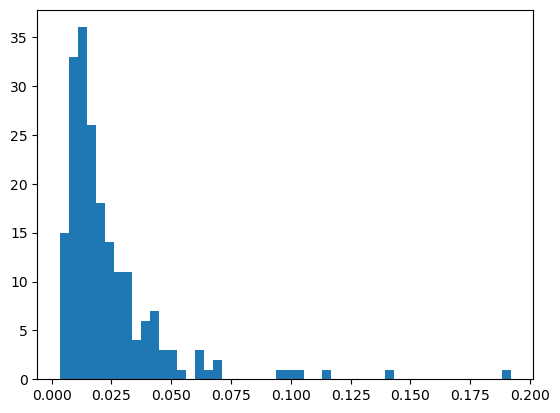

In [34]:
relative_L2 = np.linalg.norm(pred - y_test, axis = -1)/np.linalg.norm(y_test, axis = -1)

print(f'median relative L2: {np.median(relative_L2)}')
print(f'mean relative L2: {np.mean(relative_L2)}')

plt.figure()
plt.hist(relative_L2, bins = 50)
plt.show()

## my adaptation of their code

In [158]:
def train_test(x_train, x_test, y_train, model, multiinput, n_samples = None):
    pred = []
    if n_samples is not None:
        train_samples = np.zeros((x_train.shape[0], y_train.shape[-1], n_samples))
        test_samples = np.zeros((x_test.shape[0], y_train.shape[-1], n_samples))
    if multiinput:
        for i in tqdm(range(y_train.shape[-1])):
            model.fit(x_train, y_train[:, i]) # I changed this line to do a 1-1 mapping rather than 10-1
            pred.append(model.predict(x_test))
            print(model.kernel_)
            if n_samples is not None:
                train_samples[:, i, :] = model.sample_y(x_train, n_samples = n_samples)
                test_samples[:, i, :] = model.sample_y(x_test, n_samples = n_samples)

    else:
        for i in tqdm(range(y_train.shape[-1])):
            model.fit(x_train[:, i].reshape(-1, 1), y_train[:, i]) # I changed this line to do a 1-1 mapping rather than 10-1
            pred.append(model.predict(x_test[:, i].reshape(-1, 1)))
            print(model.kernel_)
            if n_samples is not None:
                train_samples[:, i, :] = model.sample_y(x_train[:, i].reshape(-1, 1), n_samples = n_samples)
                test_samples[:, i, :] = model.sample_y(x_test[:, i].reshape(-1, 1), n_samples = n_samples)

    if n_samples is not None:
        return np.stack(pred).T, model, train_samples, test_samples
    else:
        return np.stack(pred).T, model, None, None

In [159]:
# params #
n = 10
m = 10

ARD = False
multiinput = False
standardise = False
n_samples = 100
####################

x_pca = PCA(n_components = n)
y_pca = PCA(n_components = m)
x_train_pca = x_pca.fit_transform(x_train)
y_train_pca = y_pca.fit_transform(y_train)
x_test_pca = x_pca.transform(x_test)
y_test_pca = y_pca.transform(y_test)

if standardise:
    x_train_pca_stand = (x_train_pca - x_train_pca.mean(axis = 0))/x_train_pca.std(axis = 0)
    y_train_pca_stand = (y_train_pca - y_train_pca.mean(axis = 0))/y_train_pca.std(axis = 0)
    x_test_pca_stand = (x_test_pca - x_train_pca.mean(axis = 0))/x_train_pca.std(axis = 0)
    y_test_pca_stand = (y_test_pca - y_train_pca.mean(axis = 0))/y_train_pca.std(axis = 0)

In [160]:
if ARD:
    kernel = Matern(length_scale = np.ones(n), nu = 2.5)
else:
    kernel = Matern(nu = 2.5)

gp = GaussianProcessRegressor(kernel, alpha = 1e-10,  normalize_y = True, random_state = 1172023)

if standardise:
    y_pred_pca_stand, model, train_samples_pca, test_samples_pca = train_test(x_train_pca_stand, x_test_pca_stand, y_train_pca_stand, gp, multiinput = multiinput, n_samples = n_samples)
else:
    y_pred_pca, model, train_samples_pca, test_samples_pca = train_test(x_train_pca, x_test_pca, y_train_pca, gp, multiinput = multiinput, n_samples = n_samples)


  0%|          | 0/10 [00:00<?, ?it/s]

Matern(length_scale=0.000153, nu=2.5)


 10%|█         | 1/10 [00:03<00:31,  3.46s/it]

Matern(length_scale=7.5e-05, nu=2.5)


 20%|██        | 2/10 [00:06<00:26,  3.26s/it]/Users/tomcowperthwaite/opt/anaconda3/envs/mres2/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Matern(length_scale=1e-05, nu=2.5)


 30%|███       | 3/10 [00:07<00:13,  1.97s/it]/Users/tomcowperthwaite/opt/anaconda3/envs/mres2/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Matern(length_scale=1e-05, nu=2.5)


 40%|████      | 4/10 [00:07<00:08,  1.35s/it]/Users/tomcowperthwaite/opt/anaconda3/envs/mres2/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Matern(length_scale=1e-05, nu=2.5)


 50%|█████     | 5/10 [00:07<00:05,  1.03s/it]/Users/tomcowperthwaite/opt/anaconda3/envs/mres2/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Matern(length_scale=1e-05, nu=2.5)


 60%|██████    | 6/10 [00:08<00:03,  1.20it/s]/Users/tomcowperthwaite/opt/anaconda3/envs/mres2/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Matern(length_scale=1e-05, nu=2.5)


 70%|███████   | 7/10 [00:08<00:02,  1.37it/s]/Users/tomcowperthwaite/opt/anaconda3/envs/mres2/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Matern(length_scale=1e-05, nu=2.5)


 80%|████████  | 8/10 [00:09<00:01,  1.51it/s]/Users/tomcowperthwaite/opt/anaconda3/envs/mres2/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Matern(length_scale=1e-05, nu=2.5)


 90%|█████████ | 9/10 [00:09<00:00,  1.55it/s]/Users/tomcowperthwaite/opt/anaconda3/envs/mres2/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Matern(length_scale=1e-05, nu=2.5)


100%|██████████| 10/10 [00:10<00:00,  1.07s/it]


median relative L2: 1.0018678616406071
mean relative L2: 0.9960935800853181


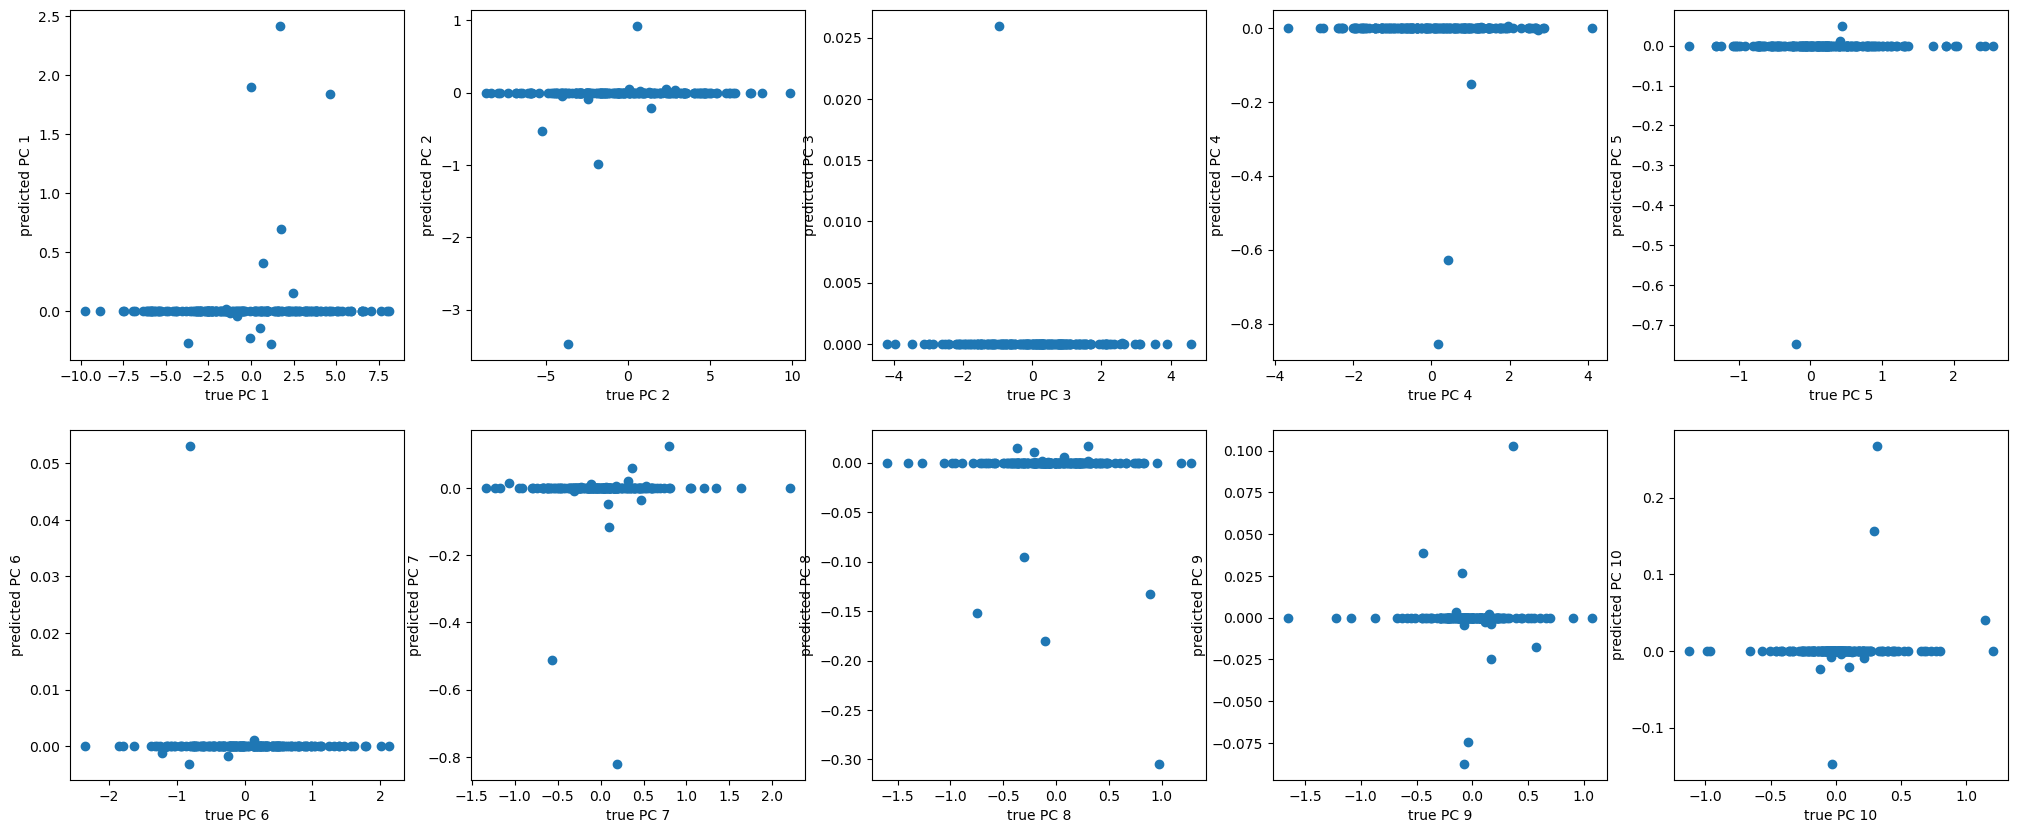

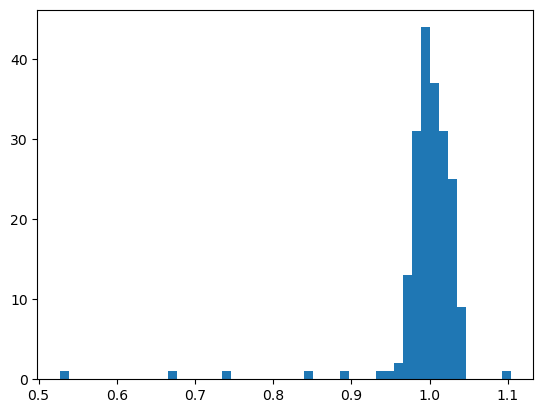

In [161]:
if standardise:
    y_pred_pca = y_pred_pca_stand*y_train_pca.std(axis = 0) + y_train_pca.mean(axis = 0)

y_pred = y_pca.inverse_transform(y_pred_pca)

relative_L2 = np.linalg.norm(y_pred - y_test, axis = -1)/np.linalg.norm(y_test, axis = -1)

print(f'median relative L2: {np.median(relative_L2)}')
print(f'mean relative L2: {np.mean(relative_L2)}')

n_rows = int(np.ceil(m/5))
fig, ax = plt.subplots(n_rows, 5, figsize = (25, n_rows*5))
ax = ax.flatten()
for i in range(m):
    ax[i].plot(y_test_pca[:, i], y_pred_pca[:, i], marker = 'o', linestyle = 'None')
    ax[i].set_xlabel(f'true PC {i + 1}')
    ax[i].set_ylabel(f'predicted PC {i + 1}')
plt.show()

plt.figure()
plt.hist(relative_L2, bins = 50)
plt.show()

(1000, 10, 100)
(200, 10, 100)
(128, 1)


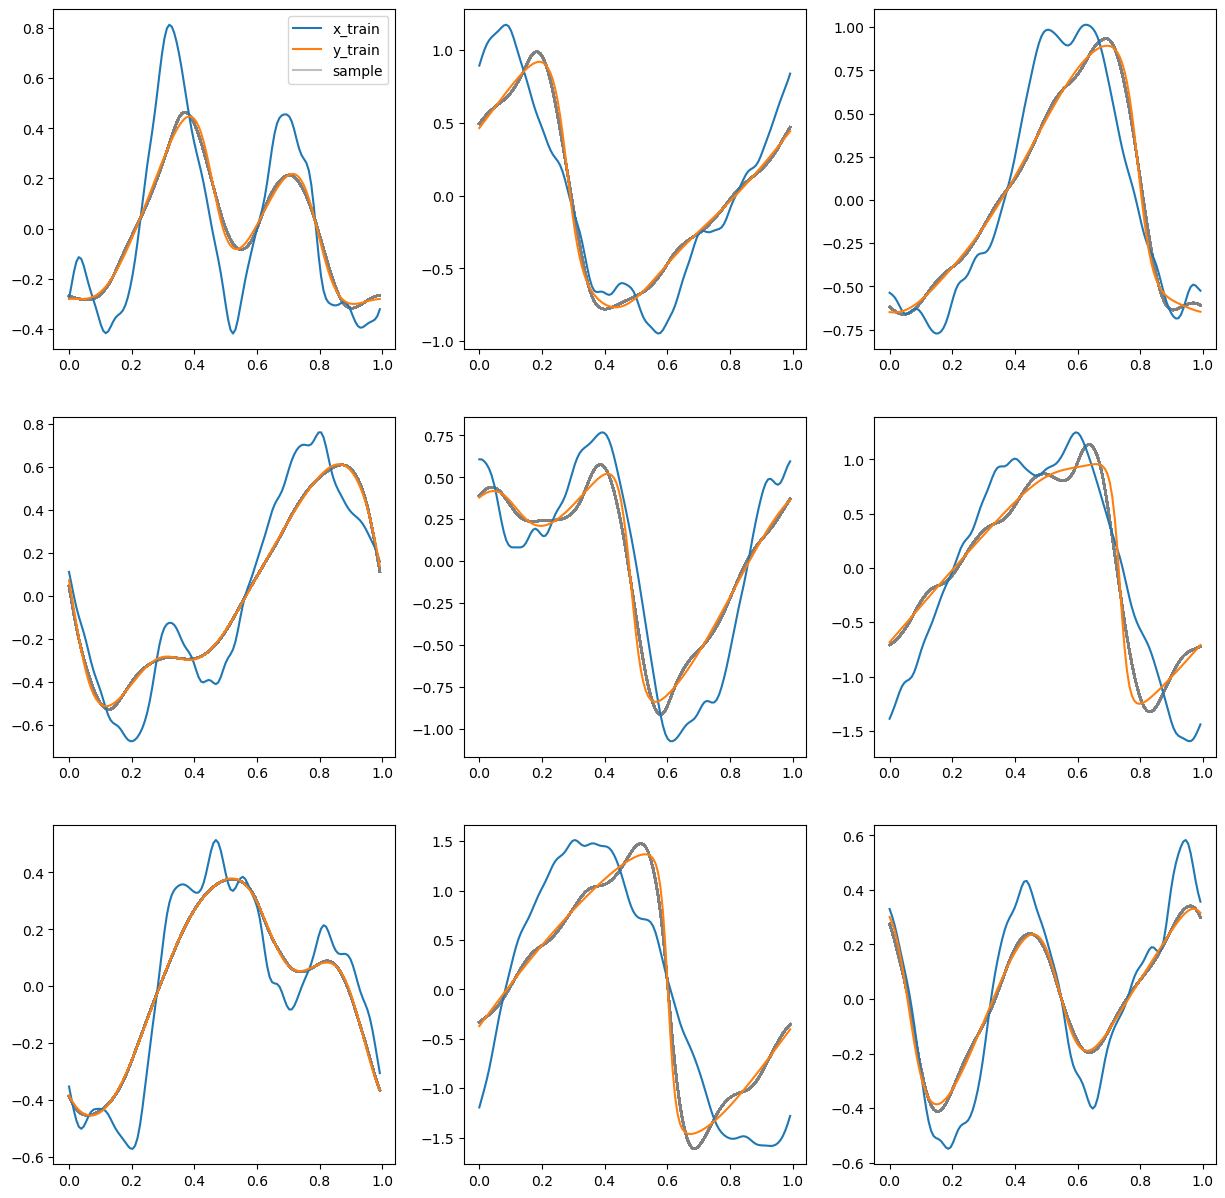

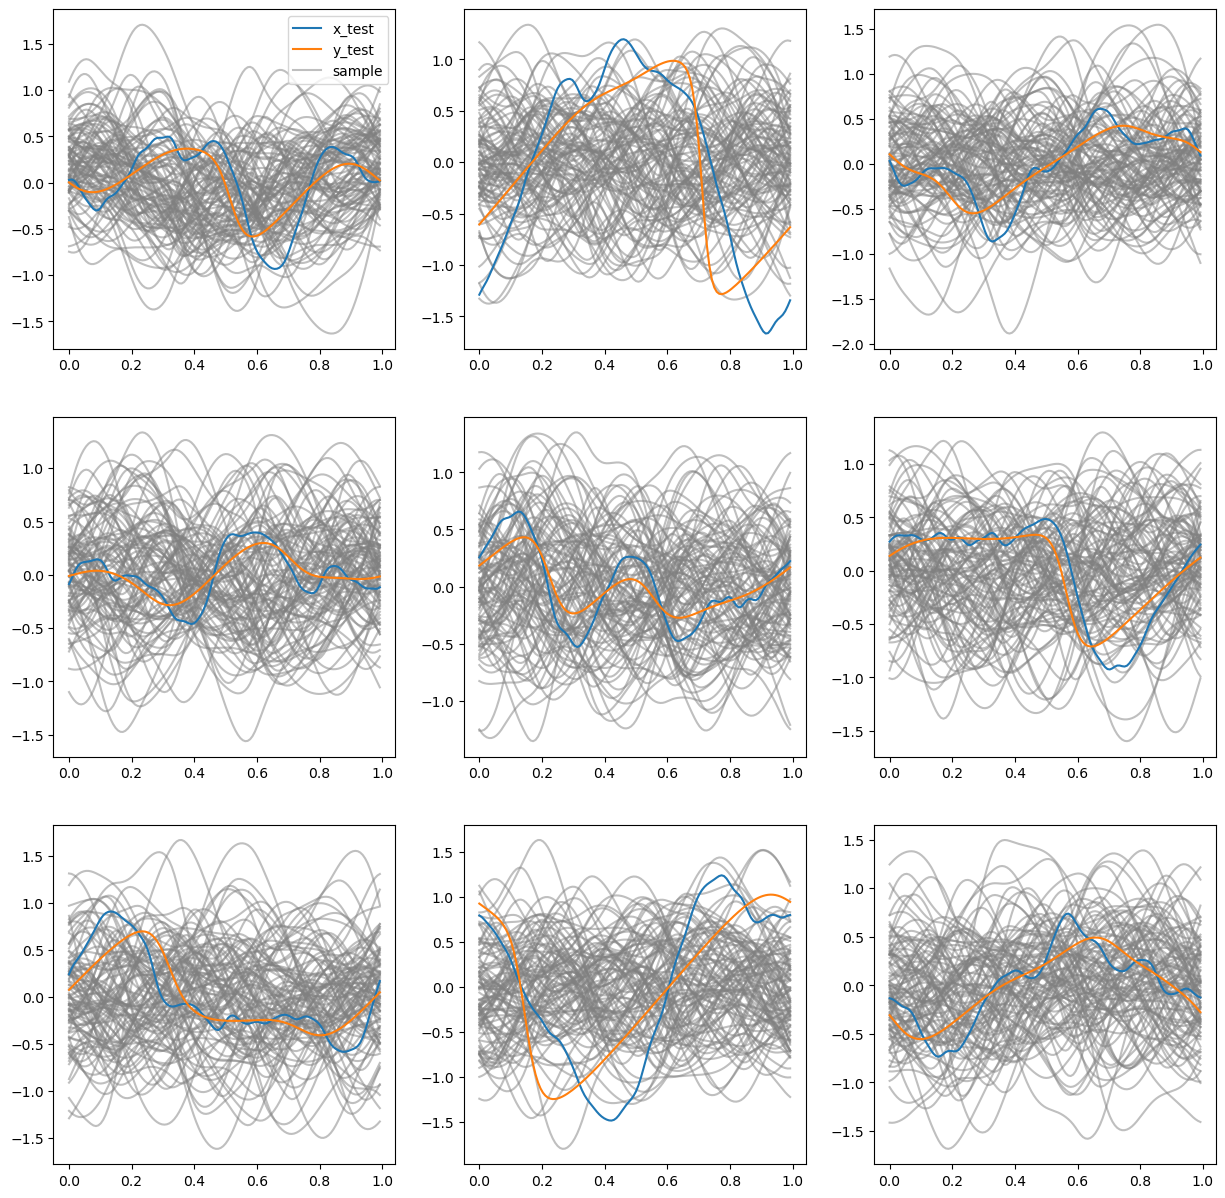

In [162]:
# take samples from the GP
print(train_samples_pca.shape)
print(test_samples_pca.shape)
print(grid.shape)

train_samples = np.zeros((x_train.shape[0], grid.shape[0], n_samples))
test_samples = np.zeros((x_test.shape[0], grid.shape[0], n_samples))

for i in range(n_samples):
    train_samples_pca_i = train_samples_pca[:, :, i]
    test_samples_pca_i = test_samples_pca[:, :, i]
    train_samples_i = y_pca.inverse_transform(train_samples_pca_i)
    test_samples_i = y_pca.inverse_transform(test_samples_pca_i)
    train_samples[:, :, i] = train_samples_i
    test_samples[:, :, i] = test_samples_i

# train
fig, ax = plt.subplots(3, 3, figsize = (15, 15))
ax = ax.flatten()
for i in range(9):
    ax[i].plot(grid, x_train[i], label='x_train')
    ax[i].plot(grid, y_train[i], label='y_train')
    for j in range(n_samples):
        ax[i].plot(grid, train_samples[i, :, j], label='sample', color = 'grey', alpha = 0.5, zorder = 0)
        if i == 0 and j == 0:
            ax[i].legend()
plt.show()

# test
fig, ax = plt.subplots(3, 3, figsize = (15, 15))
ax = ax.flatten()
for i in range(9):
    ax[i].plot(grid, x_test[i], label='x_test')
    ax[i].plot(grid, y_test[i], label='y_test')
    for j in range(n_samples):
        ax[i].plot(grid, test_samples[i, :, j], label='sample', color = 'grey', alpha = 0.5, zorder = 0)
        if i == 0 and j == 0:
            ax[i].legend()
plt.show()
    

# end of my code

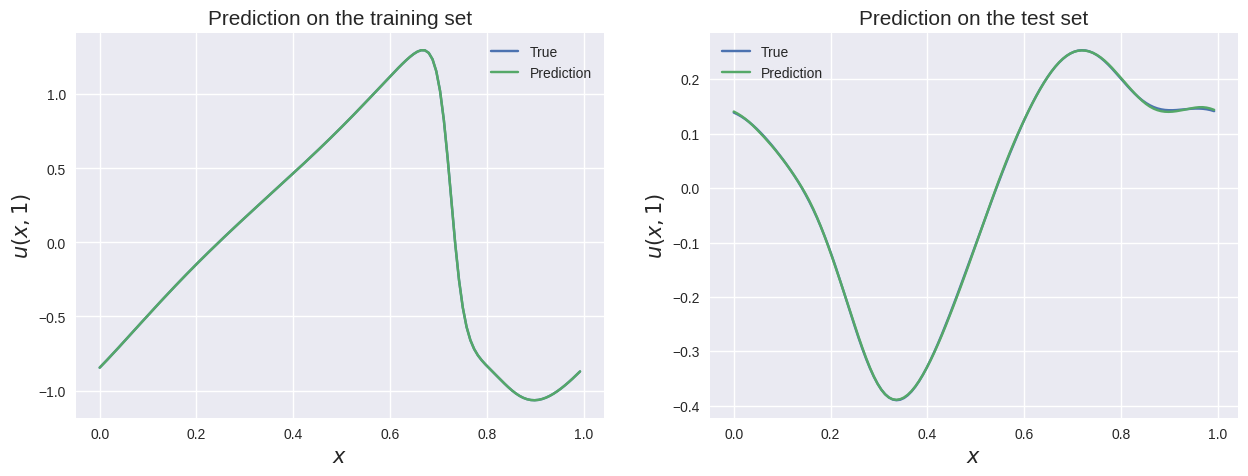

In [ ]:
idx = 15
i = 0

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15,5))
ax1.plot(grid, y_train[idx], label = "True")
ax1.plot(grid, pred_train[idx], label = "Prediction")
ax1.set_xlabel(r'$x$', size= 15)
ax1.set_ylabel(r'$u(x,1)$', size= 15)
ax1.set_title("Prediction on the training set", size = 15)
ax1.legend()

ax2.plot(grid, y_test[idx],  label = "True")
ax2.plot(grid, pred[idx],  label = "Prediction")
ax2.set_xlabel(r'$x$', size= 15)
ax2.set_ylabel(r'$u(x, 1)$', size= 15)
ax2.set_title("Prediction on the test set", size = 15)
ax2.legend()

In [ ]:
np.random.default_rng()

Generator(PCG64) at 0x7F2837E02580

# Linear regression

In [ ]:
def train_test(x_train, x_test, y_train, y_test, n_pca, model):
    # Compute the PCA decoposition
    pca = PCA(n_components=n_pca)
    x_train_pca = pca.fit_transform(x_train)
    x_test_pca = pca.transform(x_test)

    
    model.fit(x_train_pca, y_train)
    pred= model.predict(x_test_pca)
    pred_train = model.predict(x_train_pca)

    #e = compute_error_dataset(y_test, pred, knots, k)

    return pred, model, pred_train

In [ ]:
model = LinearRegression()

In [ ]:
pca_modes = np.arange(1, 20)

pca_error = []
for n_pca in pca_modes:
    error = []
    for i in range(5):
        x_train = x[i*169: i*169 + 1000]
        y_train = y[i*169: i*169 + 1000]
        #print(x_train.shape)
        pred, GP, pred_train = train_test(x_train, x_test, y_train, y_test, n_pca, model)
        e = np.mean(np.linalg.norm(pred - y_test, axis = -1)/np.linalg.norm(y_test, axis = -1))
        error.append(e)
    pca_error.append(np.mean(error))

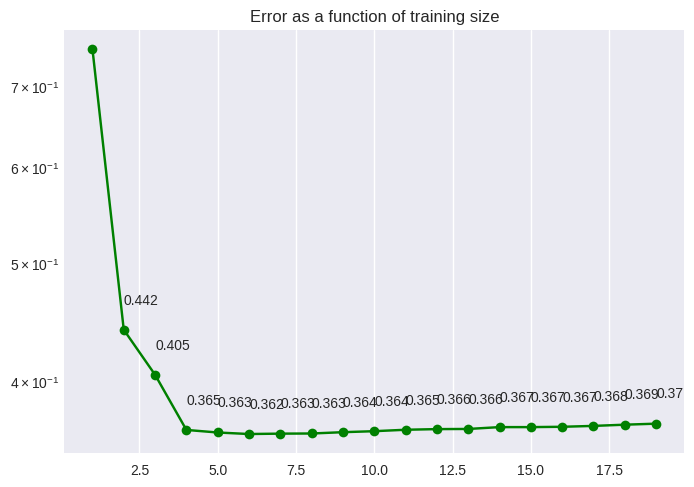

In [ ]:
plt.figure()
plt.plot(pca_modes,pca_error, '-go')
plt.yscale('log')
plt.title("Error as a function of training size")

for s, d in zip(pca_error, pca_modes):
    plt.annotate(np.round(s, 3), xy = (d ,s + s/20 ))
    
    
plt.show()

In [ ]:
np.min(pca_error), np.argmin(pca_error)

(0.3623501111918679, 5)

In [ ]:
i = 0
x_train = x[i*169: i*169 + 1000]
y_train = y[i*169: i*169 + 1000]

n_pca = 5
pred, model, pred_train = train_test(x_train, x_test, y_train, y_test, n_pca, model)
#pred_train = model.predict(x_train)

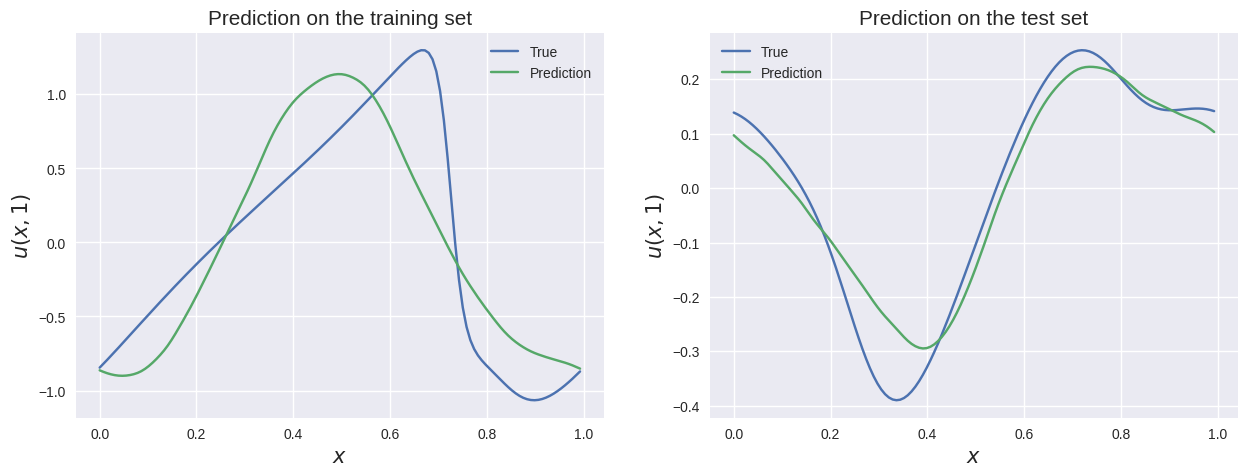

In [ ]:
idx = 15
i = 0

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15,5))
ax1.plot(grid, y_train[idx], label = "True")
ax1.plot(grid, pred_train[idx], label = "Prediction")
ax1.set_xlabel(r'$x$', size= 15)
ax1.set_ylabel(r'$u(x,1)$', size= 15)
ax1.set_title("Prediction on the training set", size = 15)
ax1.legend()

ax2.plot(grid, y_test[idx],  label = "True")
ax2.plot(grid, pred[idx],  label = "Prediction")
ax2.set_xlabel(r'$x$', size= 15)
ax2.set_ylabel(r'$u(x, 1)$', size= 15)
ax2.set_title("Prediction on the test set", size = 15)
ax2.legend()

# Polynomial regression

In [ ]:
poly = PolynomialFeatures(2)

x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

model = LinearRegression()

In [ ]:
pca_modes = np.arange(1, 20)

pca_error = []
for n_pca in pca_modes:
    error = []
    for i in range(5):
        x_train = x[i*169: i*169 + 1000]
        y_train = y[i*169: i*169 + 1000]
        x_train_poly = poly.fit_transform(x_train)
        x_test_poly = poly.fit_transform(x_test)
        #print(x_train.shape)
        pred, GP, pred_train = train_test(x_train_poly, x_test_poly, y_train, y_test, n_pca, model)
        e = np.mean(np.linalg.norm(pred - y_test, axis = -1)/np.linalg.norm(y_test, axis = -1))
        error.append(e)
    pca_error.append(np.mean(error))

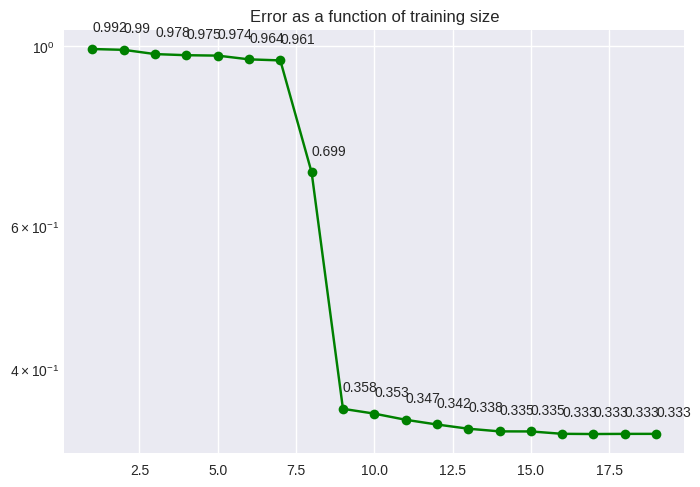

In [ ]:
plt.figure()
plt.plot(pca_modes,pca_error, '-go')
plt.yscale('log')
plt.title("Error as a function of training size")

for s, d in zip(pca_error, pca_modes):
    plt.annotate(np.round(s, 3), xy = (d ,s + s/20 ))
    
    
plt.show()

In [ ]:
np.min(pca_error), np.argmin(pca_error)

(0.332854107418273, 16)

In [ ]:
i = 0
x_train = x[i*169: i*169 + 1000]
y_train = y[i*169: i*169 + 1000]

n_pca = 17
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

pred, model, pred_train = train_test(x_train, x_test, y_train, y_test, n_pca, model)
#pred_train = model.predict(x_train)

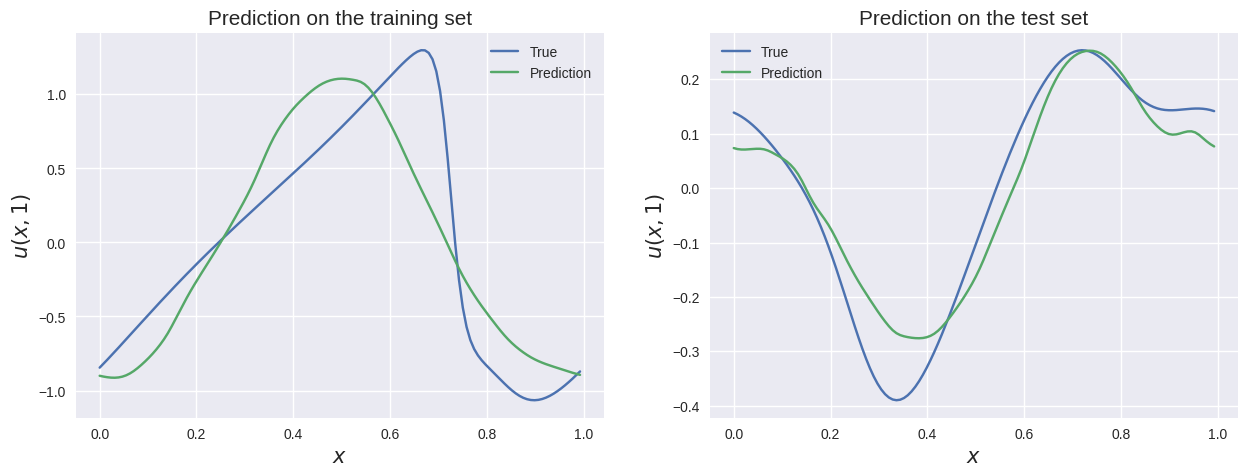

In [ ]:
idx = 15
i = 0

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15,5))
ax1.plot(grid, y_train[idx], label = "True")
ax1.plot(grid, pred_train[idx], label = "Prediction")
ax1.set_xlabel(r'$x$', size= 15)
ax1.set_ylabel(r'$u(x,1)$', size= 15)
ax1.set_title("Prediction on the training set", size = 15)
ax1.legend()

ax2.plot(grid, y_test[idx],  label = "True")
ax2.plot(grid, pred[idx],  label = "Prediction")
ax2.set_xlabel(r'$x$', size= 15)
ax2.set_ylabel(r'$u(x, 1)$', size= 15)
ax2.set_title("Prediction on the test set", size = 15)
ax2.legend()

# Polynomial regression deg 3

In [ ]:
poly = PolynomialFeatures(3)

x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

model = LinearRegression()

In [ ]:
pca_modes = np.arange(5, 20)

pca_error = []
for n_pca in pca_modes:
    print(n_pca)
    error = []
    for i in range(5):
        x_train = x[i*169: i*169 + 1000]
        y_train = y[i*169: i*169 + 1000]
        x_train_poly = poly.fit_transform(x_train)
        x_test_poly = poly.fit_transform(x_test)
        #print(x_train.shape)
        pred, GP, pred_train = train_test(x_train_poly, x_test_poly, y_train, y_test, n_pca, model)
        e = np.mean(np.linalg.norm(pred - y_test, axis = -1)/np.linalg.norm(y_test, axis = -1))
        error.append(e)
    pca_error.append(np.mean(error))

5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


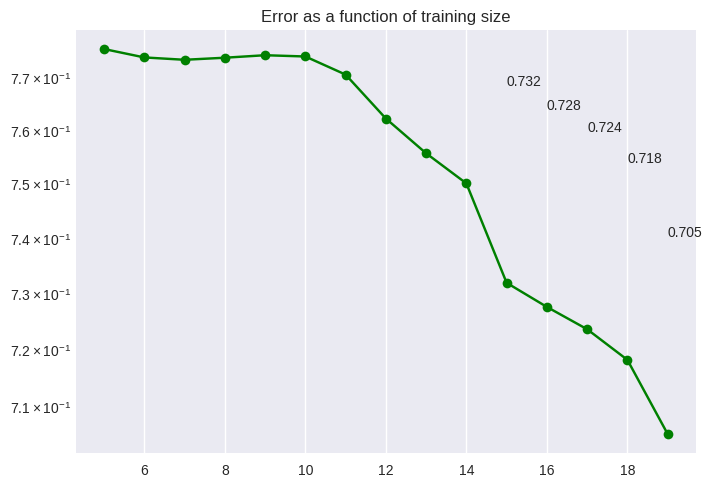

In [ ]:
plt.figure()
plt.plot(pca_modes,pca_error, '-go')
plt.yscale('log')
plt.title("Error as a function of training size")

for s, d in zip(pca_error, pca_modes):
    plt.annotate(np.round(s, 3), xy = (d ,s + s/20 ))
    
    
plt.show()

In [ ]:
np.min(pca_error), np.argmin(pca_error)

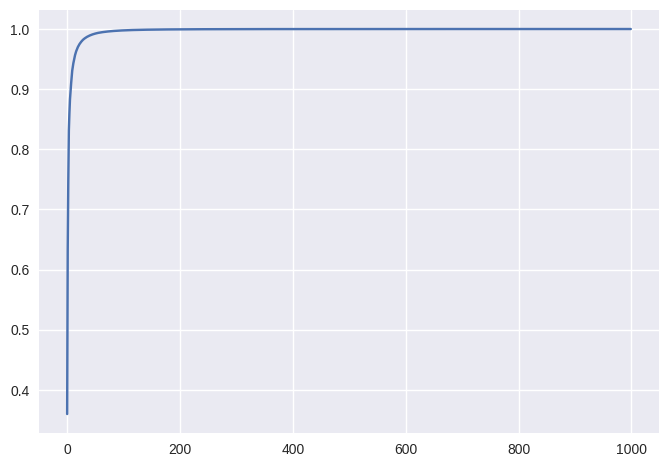

13

In [ ]:


i = 0
x_train = x[i*169: i*169 + 1000]
y_train = y[i*169: i*169 + 1000]

x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)


pca = PCA(n_components=1000)
x_train_pca = pca.fit_transform(x_train_poly)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()
#print(np.cumsum(pca.explained_variance_ratio_))

np.where(np.cumsum(pca.explained_variance_ratio_) > 0.95)[0][0]

In [ ]:
n_pca = 13
print(n_pca)
error = []
for i in range(5):
        x_train = x[i*169: i*169 + 1000]
        y_train = y[i*169: i*169 + 1000]
        x_train_poly = poly.fit_transform(x_train)
        x_test_poly = poly.fit_transform(x_test)
        #print(x_train.shape)
        pred, GP, pred_train = train_test(x_train_poly, x_test_poly, y_train, y_test, n_pca, model)
        e = np.mean(np.linalg.norm(pred - y_test, axis = -1)/np.linalg.norm(y_test, axis = -1))
        error.append(e)
print(np.mean(error))

13
0.7556950345566795


In [ ]:
np.where(np.cumsum(pca.explained_variance_ratio_) > 0.99)[0][0]

42

In [ ]:
n_pca = 42
print(n_pca)
error = []
for i in range(5):
        x_train = x[i*169: i*169 + 1000]
        y_train = y[i*169: i*169 + 1000]
        x_train_poly = poly.fit_transform(x_train)
        x_test_poly = poly.fit_transform(x_test)
        #print(x_train.shape)
        pred, GP, pred_train = train_test(x_train_poly, x_test_poly, y_train, y_test, n_pca, model)
        e = np.mean(np.linalg.norm(pred - y_test, axis = -1)/np.linalg.norm(y_test, axis = -1))
        error.append(e)
print(np.mean(error))

42
0.5990256818282329


In [ ]:
np.where(np.cumsum(pca.explained_variance_ratio_) > 0.999)[0][0]

149

In [ ]:
n_pca = 149
print(n_pca)
error = []
for i in range(5):
        x_train = x[i*169: i*169 + 1000]
        y_train = y[i*169: i*169 + 1000]
        x_train_poly = poly.fit_transform(x_train)
        x_test_poly = poly.fit_transform(x_test)
        #print(x_train.shape)
        pred, GP, pred_train = train_test(x_train_poly, x_test_poly, y_train, y_test, n_pca, model)
        e = np.mean(np.linalg.norm(pred - y_test, axis = -1)/np.linalg.norm(y_test, axis = -1))
        error.append(e)
print(np.mean(error))

149
0.24391256920185636


In [ ]:
def train_test_no_pca(x_train, x_test, y_train, y_test, model):

    
    model.fit(x_train, y_train)
    pred= model.predict(x_test)
    pred_train = model.predict(x_train)

    #e = compute_error_dataset(y_test, pred, knots, k)

    return pred, model, pred_train

In [ ]:
error = []
for i in range(5):
        x_train = x[i*169: i*169 + 1000]
        y_train = y[i*169: i*169 + 1000]
        x_train_poly = poly.fit_transform(x_train)
        x_test_poly = poly.fit_transform(x_test)
        #print(x_train.shape)
        pred, GP, pred_train = train_test_no_pca(x_train_poly, x_test_poly, y_train, y_test, model)
        e = np.mean(np.linalg.norm(pred - y_test, axis = -1)/np.linalg.norm(y_test, axis = -1))
        error.append(e)
print(np.mean(error))

0.2814261882757557


In [ ]:
i = 0
x_train = x[i*169: i*169 + 1000]
y_train = y[i*169: i*169 + 1000]

n_pca = 149
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

pred, model, pred_train = train_test(x_train_poly, x_test_poly, y_train, y_test, n_pca, model)
#pred_train = model.predict(x_train)

In [ ]:
e = np.mean(np.linalg.norm(pred - y_test, axis = -1)/np.linalg.norm(y_test, axis = -1))

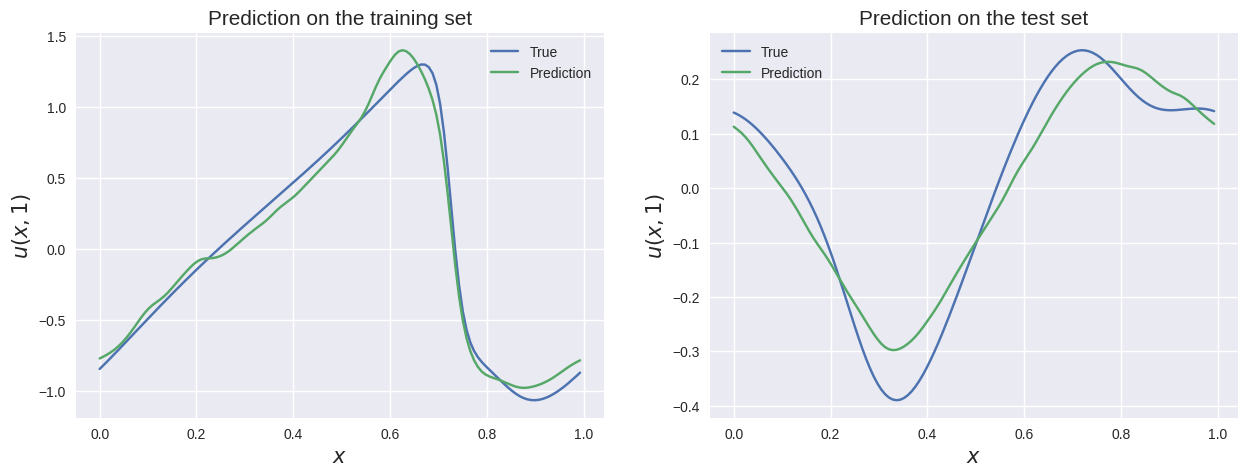

In [ ]:
idx = 15
i = 0

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15,5))
ax1.plot(grid, y_train[idx], label = "True")
ax1.plot(grid, pred_train[idx], label = "Prediction")
ax1.set_xlabel(r'$x$', size= 15)
ax1.set_ylabel(r'$u(x,1)$', size= 15)
ax1.set_title("Prediction on the training set", size = 15)
ax1.legend()

ax2.plot(grid, y_test[idx],  label = "True")
ax2.plot(grid, pred[idx],  label = "Prediction")
ax2.set_xlabel(r'$x$', size= 15)
ax2.set_ylabel(r'$u(x, 1)$', size= 15)
ax2.set_title("Prediction on the test set", size = 15)
ax2.legend()